## Meteorite EDA

Import libraries and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plo


#read in data
data = pd.read_csv("Meteorite_Landings.csv")
data.head(10)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
5,Adhi Kot,379,Valid,EH4,4239.0,Fell,1919.0,32.10000,71.80000,"(32.1, 71.8)"
6,Adzhi-Bogdo (stone),390,Valid,LL3-6,910.0,Fell,1949.0,44.83333,95.16667,"(44.83333, 95.16667)"
7,Agen,392,Valid,H5,30000.0,Fell,1814.0,44.21667,0.61667,"(44.21667, 0.61667)"
8,Aguada,398,Valid,L6,1620.0,Fell,1930.0,-31.60000,-65.23333,"(-31.6, -65.23333)"
9,Aguila Blanca,417,Valid,L,1440.0,Fell,1920.0,-30.86667,-64.55000,"(-30.86667, -64.55)"


In [2]:
# recclass = classification 
# reclat = latitude
# reclong = longitude

Some housecleaning

In [3]:
data.isnull().sum()

name              0
id                0
nametype          0
recclass          0
mass (g)        131
fall              0
year            291
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

In [4]:
data = data.dropna()
data.isnull().sum()

name           0
id             0
nametype       0
recclass       0
mass (g)       0
fall           0
year           0
reclat         0
reclong        0
GeoLocation    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38115 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         38115 non-null  object 
 1   id           38115 non-null  int64  
 2   nametype     38115 non-null  object 
 3   recclass     38115 non-null  object 
 4   mass (g)     38115 non-null  float64
 5   fall         38115 non-null  object 
 6   year         38115 non-null  float64
 7   reclat       38115 non-null  float64
 8   reclong      38115 non-null  float64
 9   GeoLocation  38115 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.2+ MB


In [6]:
class_categories = data['recclass'].value_counts()
len(class_categories) #number of different classes of meteorites

422

Visualising the top meteorite classes

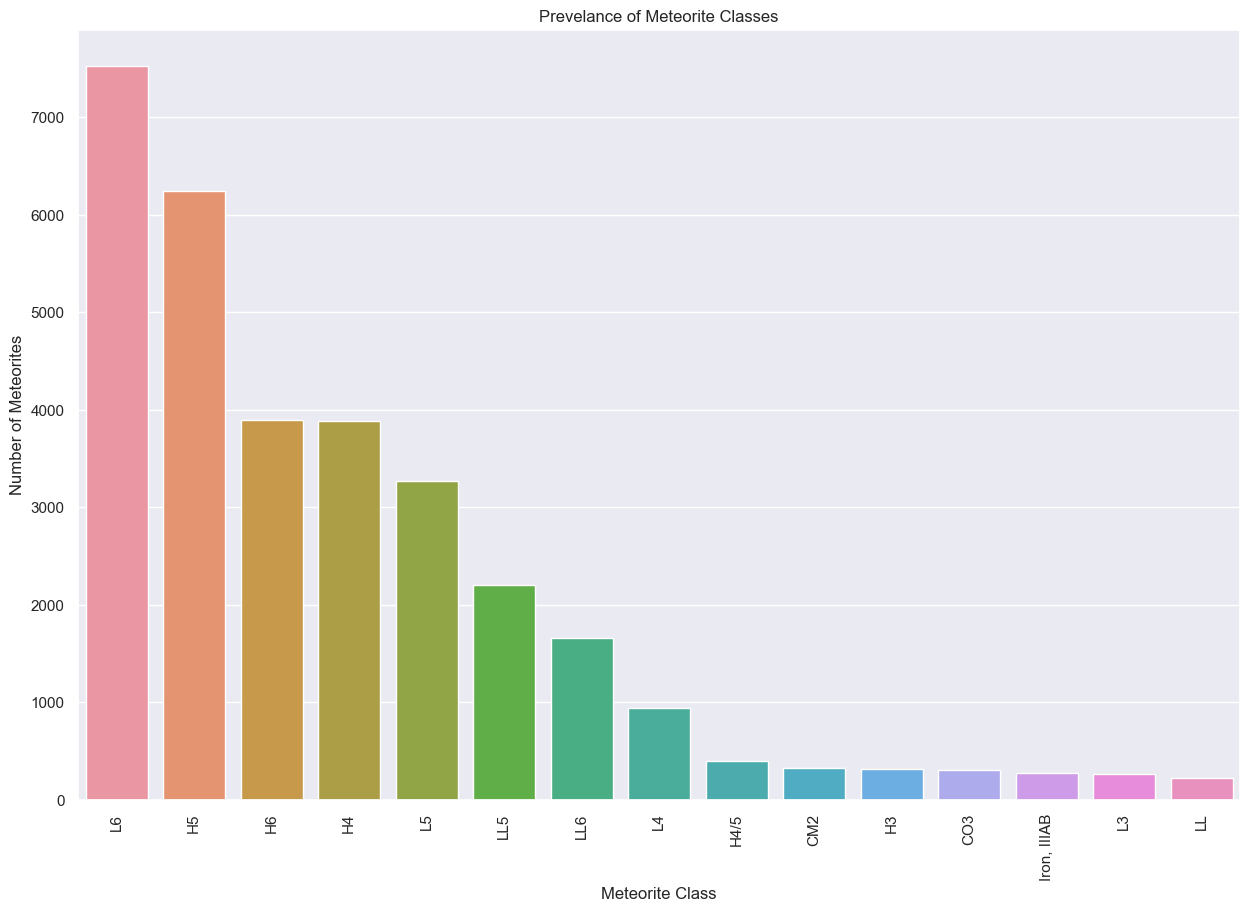

In [7]:
#plot the prevelance of recclass in the overall dataset 
#Get the top 20 classes
top_classes = data['recclass'].value_counts().head(15)
top_classes

sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x=top_classes.index, y=top_classes.values)
plt.title("Prevelance of Meteorite Classes")
plt.xlabel("Meteorite Class")
plt.ylabel("Number of Meteorites")
plt.xticks(rotation=90)
plt.show()

Visualising meteorite recordings over time

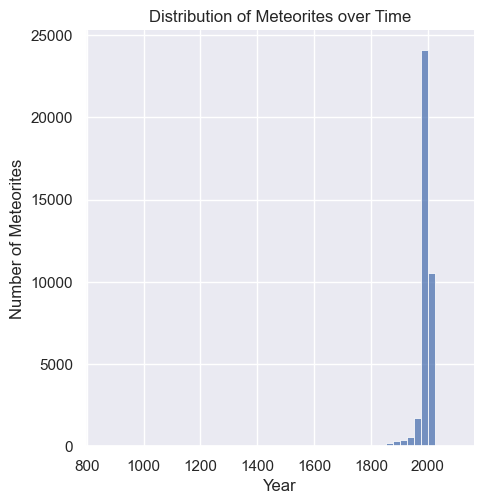

In [8]:
#distribution of meteorites over time
#plt.figure(figsize=(20,10))

sns.set(rc={'figure.figsize':(15,10)})
sns.displot(data['year'], bins=50, kde=False)
plt.title("Distribution of Meteorites over Time")
plt.xlabel("Year")
plt.ylabel("Number of Meteorites")
plt.show()


In [9]:
#It would be wrong to assume that there is an increase in the number of meteorites over time.
#Most likely we are just more capable of finding them now than we were in the past.
#lets look at 1950-onwards
data_1950_now = data[data['year'] > 1950]

In [12]:
year_counts = dict(data_1950_now['year'].value_counts())
year_counts = list(year_counts.keys())
year_counts.sort(reverse=True)
year_counts[:10]


[2101.0,
 2013.0,
 2012.0,
 2011.0,
 2010.0,
 2009.0,
 2008.0,
 2007.0,
 2006.0,
 2005.0]

In [13]:
#drop data with year 2101.0
index_values = data_1950_now[data_1950_now['year'] == 2101.0].index
index_values[0]

print(len(data_1950_now))
data_1950_now = data_1950_now.drop(data_1950_now.index[index_values[0]])
print(len(data_1950_now))

36443
36442


36442


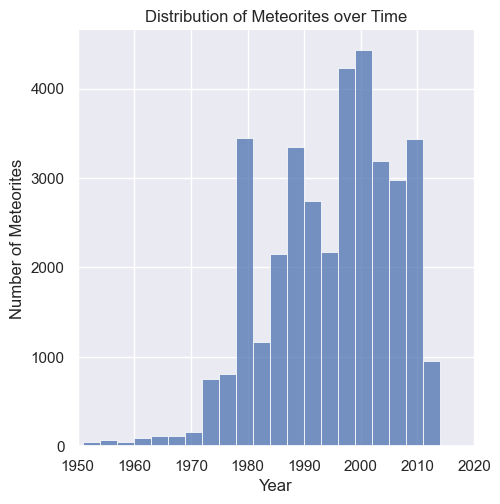

In [14]:
print(len(data_1950_now))
sns.displot(data_1950_now['year'], bins=50, kde=False)
plt.title("Distribution of Meteorites over Time")
plt.xlabel("Year")
plt.xlim(1950, 2020)
plt.ylabel("Number of Meteorites")
plt.show()

In [15]:
#Here we can really start to see where the increase in meteorites is coming from. 
#It is not a linear increase, but rather a sharp increase from 1970 onwards.

Visualising where these meteorites are landing

In [16]:
#get values of reclat into a list
lat_values = data_1950_now['reclat'].values
long_values = data_1950_now['reclong'].values

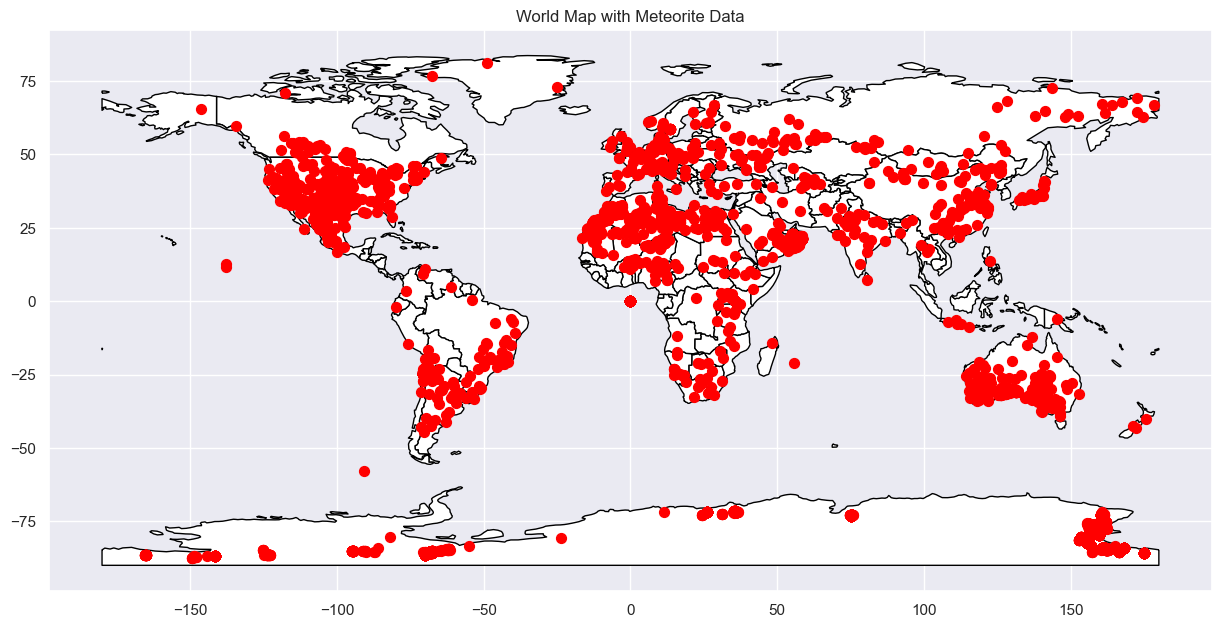

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt

# create a GeoDataFrame from a list of longitude and latitude data
data = {'Latitude': lat_values,
        'Longitude': long_values}
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['Longitude'], data['Latitude']))

# load a world map shapefile using GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# plot the world map and the GeoDataFrame on the same figure
ax = world.plot(color='white', edgecolor='black')
gdf.plot(ax=ax, color='red', markersize=50)

# set the title and show the plot
plt.title('World Map with Meteorite Data')
plt.show()


Visualising the size (mass) distribution of common meteorites

In [18]:
# find the most common classes
data_1950_now['recclass'].value_counts().head(5)


L6    7243
H5    6060
H6    3801
H4    3787
L5    3182
Name: recclass, dtype: int64

In [19]:

data_1950_now_L6 = data_1950_now[data_1950_now['recclass'] == 'L6']
data_1950_now_L6["mass (g)"].value_counts()

#removing outliters from the data
data_1950_now_L6 = data_1950_now[data_1950_now['mass (g)'] < 1000]

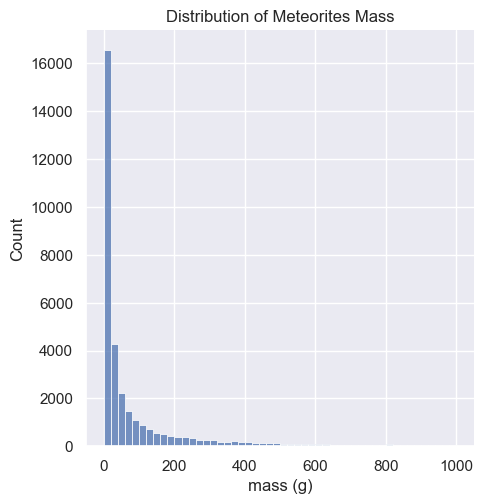

In [20]:
sns.displot(data_1950_now_L6['mass (g)'], bins=50, kde=False)
plt.title("Distribution of Meteorites Mass")
plt.show()